In [1]:
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

## T·∫£i b·ªô d·ªØ li·ªáu comment.json

In [2]:
import requests

url = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/entities/comment.json"
comment_df = pl.read_ndjson(url)
comment_df.head()

shape: (5, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id    ‚îÜ user_id  ‚îÜ text             ‚îÜ resource_id ‚îÜ create_time         ‚îÇ
‚îÇ ---   ‚îÜ ---      ‚îÜ ---              ‚îÜ ---         ‚îÜ ---                 ‚îÇ
‚îÇ str   ‚îÜ i64      ‚îÜ str              ‚îÜ str         ‚îÜ str                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Cm_1  ‚îÜ 10030806 ‚îÜ ÊµãËØïËØÑËÆ∫         ‚îÜ null        ‚îÜ 2019-08-05 12:55:27 ‚îÇ
‚îÇ Cm_4  ‚îÜ 1705400  ‚îÜ ÂóØÂóØ             ‚îÜ null        ‚îÜ 2019-08-05 16:56:43 ‚îÇ
‚îÇ Cm_5  ‚îÜ 10031537 ‚îÜ ÊòØÁöÑÔºåÊàë‰πüÁúã‰∏çÂà∞ ‚îÜ null        ‚îÜ 2019-08-07 21:05:38 ‚îÇ
‚îÇ Cm_7  ‚îÜ 10031502 ‚îÜ Â§ßÂ∏àÂÇÖas         ‚îÜ null        ‚îÜ 2019-08-09 13:06:06 ‚îÇ
‚îÇ Cm_12 ‚îÜ 10031397 ‚îÜ ÁÇπËµû             ‚îÜ null        ‚îÜ 2019-08-09 16:38:56 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [3]:
comment_df

shape: (8_395_141, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id          ‚îÜ user_id  ‚îÜ text                            ‚îÜ resource_id ‚îÜ create_time         ‚îÇ
‚îÇ ---         ‚îÜ ---      ‚îÜ ---                             ‚îÜ ---         ‚îÜ ---                 ‚îÇ
‚îÇ str         ‚îÜ i64      ‚îÜ str                             ‚îÜ str         ‚îÜ str                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Cm_1        ‚îÜ 10030806 ‚îÜ ÊµãËØïËØÑËÆ∫                        ‚îÜ null        ‚îÜ 2019-08-05 12:55:27 ‚îÇ
‚îÇ Cm_4        ‚îÜ 1705400  ‚îÜ ÂóØÂóØ                            ‚îÜ null        ‚îÜ 2019-08-05 16:56:43 ‚îÇ
‚îÇ Cm_5        ‚îÜ 10031537 ‚îÜ ÊòØÁöÑÔºåÊàë‰πüÁúã‰∏çÂà∞                ‚îÜ null        ‚îÜ 2019-08-07 21:05:38 ‚îÇ
‚îÇ Cm_7        ‚îÜ 10031502 ‚îÜ Â§ßÂ∏àÂÇÖas                        ‚îÜ null        ‚îÜ 2019-08-09 13:06:06 ‚îÇ
‚îÇ Cm_12       ‚îÜ 10031397 ‚îÜ ÁÇπËµû                            ‚îÜ null        ‚îÜ 2019-08-09 16:38:56 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶                               ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶                   ‚îÇ
‚îÇ Cm_17044056 ‚îÜ 11526935 ‚îÜ Èí¢Á≠ãÊ∑∑ÂáùÂúü‰∏éÁ†å‰ΩìÁªìÊûÑ(2020Áßã)Èùû  ‚îÜ null        ‚îÜ 2020-11-19 03:59:57 ‚îÇ
‚îÇ             ‚îÜ          ‚îÜ Â∏∏Â•Ω                            ‚îÜ             ‚îÜ                     ‚îÇ
‚îÇ Cm_17044057 ‚îÜ 11526935 ‚îÜ Èí¢Á≠ãÊ∑∑ÂáùÂúü‰∏éÁ†å‰ΩìÁªìÊûÑ(2020Áßã)Èùû  ‚îÜ null        ‚îÜ 2020-11-19 04:00:15 ‚îÇ
‚îÇ             ‚îÜ          ‚îÜ Â∏∏Â•Ω                            ‚îÜ             ‚îÜ                     ‚îÇ
‚îÇ Cm_17044058 ‚îÜ 35197833 ‚îÜ Êúâ                              ‚îÜ null        ‚îÜ 2020-11-19 04:00:18 ‚îÇ
‚îÇ Cm_17044059 ‚îÜ 14660224 ‚îÜ Êú∫Ê¢∞Âà∂Âõæ‰∏éËÆ°ÁÆóÊú∫ÁªòÂõæ(2020Áßã)Èùû  ‚îÜ null        ‚îÜ 2020-11-19 04:00:20 ‚îÇ
‚îÇ             ‚îÜ          ‚îÜ Â∏∏Â•Ω                            ‚îÜ             ‚îÜ                     ‚îÇ
‚îÇ Cm_17044061 ‚îÜ 33319251 ‚îÜ ‰∏çÁü•ÈÅì                          ‚îÜ null        ‚îÜ 2020-11-19 04:00:55 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## Tr·ª±c quan h√≥a d·ªØ li·ªáu

### C√°c c·ªôt d·ªØ li·ªáu

In [ ]:
comment_df.columns

['id', 'user_id', 'text', 'resource_id', 'create_time']

In [ ]:
comment_df.head(10)

shape: (10, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id    ‚îÜ user_id  ‚îÜ text             ‚îÜ resource_id ‚îÜ create_time         ‚îÇ
‚îÇ ---   ‚îÜ ---      ‚îÜ ---              ‚îÜ ---         ‚îÜ ---                 ‚îÇ
‚îÇ str   ‚îÜ i64      ‚îÜ str              ‚îÜ str         ‚îÜ str                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Cm_1  ‚îÜ 10030806 ‚îÜ ÊµãËØïËØÑËÆ∫         ‚îÜ null        ‚îÜ 2019-08-05 12:55:27 ‚îÇ
‚îÇ Cm_4  ‚îÜ 1705400  ‚îÜ ÂóØÂóØ             ‚îÜ null        ‚îÜ 2019-08-05 16:56:43 ‚îÇ
‚îÇ Cm_5  ‚îÜ 10031537 ‚îÜ ÊòØÁöÑÔºåÊàë‰πüÁúã‰∏çÂà∞ ‚îÜ null        ‚îÜ 2019-08-07 21:05:38 ‚îÇ
‚îÇ Cm_7  ‚îÜ 10031502 ‚îÜ Â§ßÂ∏àÂÇÖas         ‚îÜ null        ‚îÜ 2019-08-09 13:06:06 ‚îÇ
‚îÇ Cm_12 ‚îÜ 10031397 ‚îÜ ÁÇπËµû             ‚îÜ null        ‚îÜ 2019-08-09 16:38:56 ‚îÇ
‚îÇ Cm_13 ‚îÜ 10031397 ‚îÜ Â•ΩÊª¥             ‚îÜ null        ‚îÜ 2019-08-09 17:29:01 ‚îÇ
‚îÇ Cm_14 ‚îÜ 10031528 ‚îÜ ÂæàÂ•ΩÔºåËµû‰∏Ä‰∏™     ‚îÜ null        ‚îÜ 2019-08-09 17:41:54 ‚îÇ
‚îÇ Cm_16 ‚îÜ 10031531 ‚îÜ ËÄÅÂ∏àÂ•Ω           ‚îÜ null        ‚îÜ 2019-08-09 17:44:31 ‚îÇ
‚îÇ Cm_19 ‚îÜ 10031356 ‚îÜ Â•ΩÁöÑ             ‚îÜ null        ‚îÜ 2019-08-09 18:20:05 ‚îÇ
‚îÇ Cm_20 ‚îÜ 10031356 ‚îÜ Â•ΩÁöÑ             ‚îÜ null        ‚îÜ 2019-08-09 18:20:07 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

###T∆∞∆°ng quan gi·ªØa d·ªØ li·ªáu Null v√† Not_Null

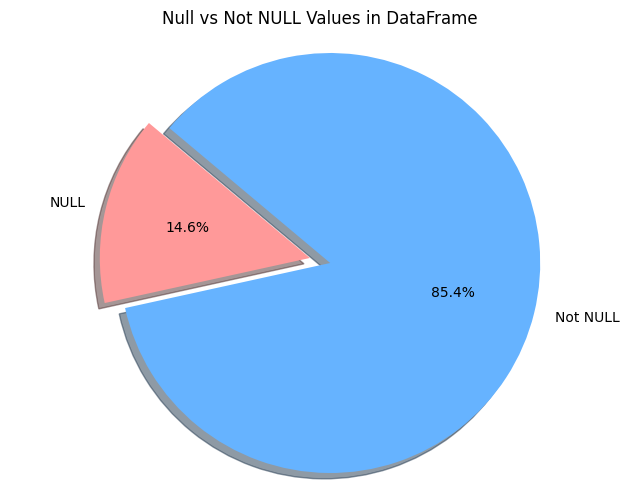

In [ ]:
comment_df = comment_df.to_pandas()

total_count = len(comment_df)

# Calculate the number of null values for each column
null_count = comment_df.isnull().sum()  # This gives the null count for each column

# Calculate the number of non-null values for each column
not_null_count = total_count - null_count

# Calculate percentages (column-wise)
null_percentage = (null_count / total_count) * 100
not_null_percentage = (not_null_count / total_count) * 100

# Convert percentages to total percentages (summing across columns)
total_null_percentage = (null_count.sum() / (total_count * len(comment_df.columns))) * 100
total_not_null_percentage = 100 - total_null_percentage  # Ensures that the sum is 100%

# Pie chart data
labels = ['NULL', 'Not NULL']
sizes = [total_null_percentage, total_not_null_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the 'NULL' slice

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plot
plt.title('Null vs Not NULL Values in DataFrame')  # Optional: Add a title
plt.show()

In [ ]:
resource_group = comment_df.groupby("resource_id").size().reset_index(name='count')
resource_group

resource_id  count
0       Ex_1053431      1
1       Ex_1058388      1
2       Ex_1070388      2
3       Ex_1119567      5
4       Ex_1119656      2
...            ...    ...
100908    V_999703      1
100909    V_999920      3
100910    V_999938      1
100911    V_999979      1
100912    V_999985      1

[100913 rows x 2 columns]

###Th·ªëng k√™ s·ªë l∆∞·ª£ng comment ng∆∞·ªùi d√πng

In [ ]:
user_id_grouped = comment_df.groupby("user_id").size().reset_index(name='count')

# Sort values by 'count' in descending order
user_id_grouped = user_id_grouped.sort_values('count', ascending=False)

# Get the top 20 users
user_id_grouped = user_id_grouped.head(20)

# Display the result
print(user_id_grouped)

         user_id  count
106296   8523466  19349
425717  21130929   6012
410095  19919624   4644
671392  30042257   4059
425685  21127560   3912
425726  21131459   3763
410092  19919548   2974
426517  21220105   2974
482699  25265704   2492
425707  21130094   2392
671701  30045726   2379
425713  21130862   2235
425998  21160109   2196
425752  21133533   2053
425711  21130725   1998
401953  19498847   1979
47115    4789799   1938
671442  30043027   1921
425715  21130881   1870
12115    1695165   1717


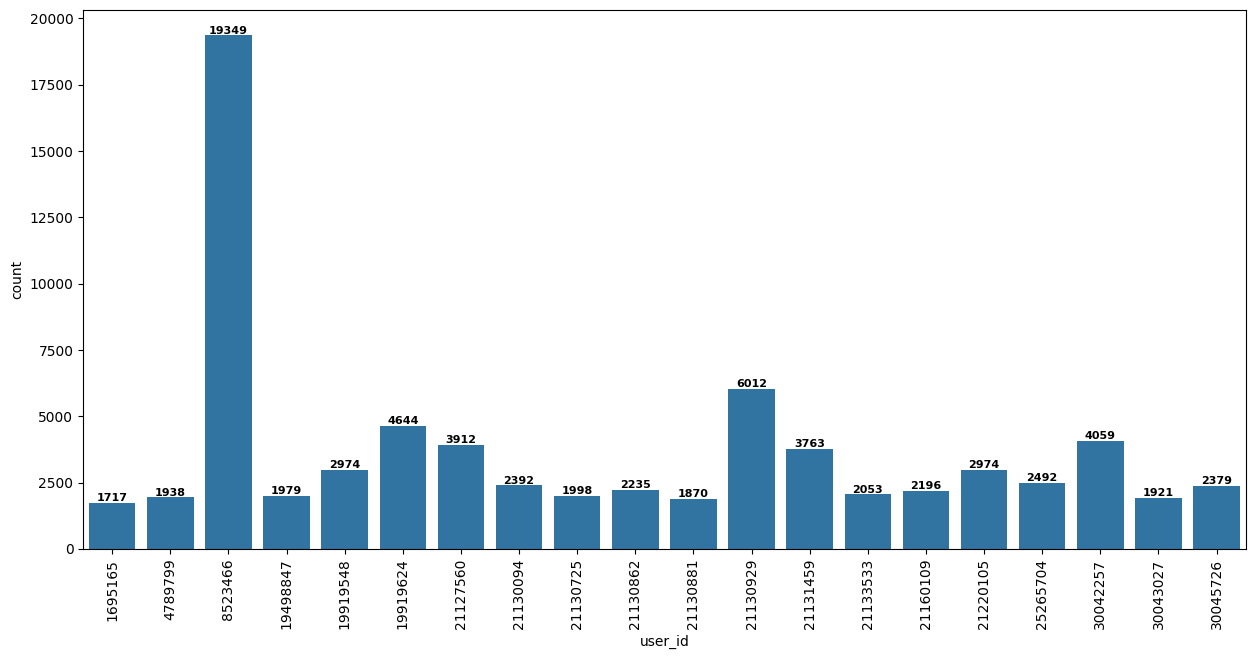

In [ ]:
import seaborn as sns
# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='user_id', y='count', data=user_id_grouped)
# Th√™m ch√∫ th√≠ch l√† s·ªë gi√° tr·ªã tr√™n ƒë·∫ßu m·ªói c·ªôt
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize = 8
    )
plt.xlabel('user_id')
plt.ylabel('count')

plt.xticks(rotation = 90)
plt.show()

###Th·ªëng k√™ th·ªùi gian b√¨nh lu·∫≠n

In [ ]:
year_df = comment_df.groupby(comment_df['create_time'].str[:4]).size().reset_index(name='count')

# Rename the first column to 'year'
year_df.columns = ['year', 'count']

# Display the result
print(year_df)

   year    count
0  2019   724887
1  2020  7670254


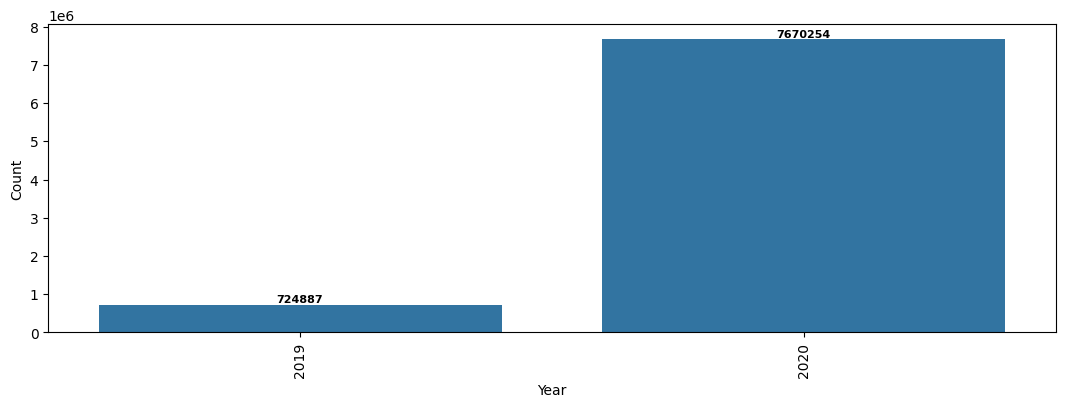

In [ ]:
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='year', y='count', data=year_df)
# Th√™m ch√∫ th√≠ch l√† s·ªë gi√° tr·ªã tr√™n ƒë·∫ßu m·ªói c·ªôt
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize = 8
    )
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation = 90)
plt.show()

In [ ]:
comment_df['time'] = comment_df['create_time'].str[11:13]  # Extracting hour (12th and 13th characters)

# Group by the extracted time and count occurrences
time_df = comment_df.groupby('time').size().reset_index(name='count')

# Sort the DataFrame by 'count'
time_df = time_df.sort_values('count')

# Display the result
print(time_df)

   time   count
5    05   10164
4    04   10882
3    03   15841
6    06   25280
2    02   32721
1    01   61667
7    07   84878
0    00  140034
8    08  287509
23   23  324814
9    09  451125
22   22  455377
12   12  457253
18   18  470922
13   13  471483
19   19  489067
21   21  508428
20   20  522425
17   17  555622
14   14  569597
10   10  592815
11   11  595647
15   15  630657
16   16  630933


- K·∫øt lu·∫≠n:

1.   D·ªØ li·ªáu n√†y cho th·∫•y ng∆∞·ªùi d√πng ho·∫°t ƒë·ªông t√≠ch c·ª±c h∆°n v√†o gi·ªØa ng√†y v√† chi·ªÅu t·ªëi, ƒë·∫∑c bi·ªát l√† trong kho·∫£ng th·ªùi gian t·ª´ 15 gi·ªù ƒë·∫øn 16 gi·ªù.

2.   Ng∆∞·ªùi d√πng ch·ªß y·∫øu b√¨nh lu·∫≠n trong nƒÉm 2020



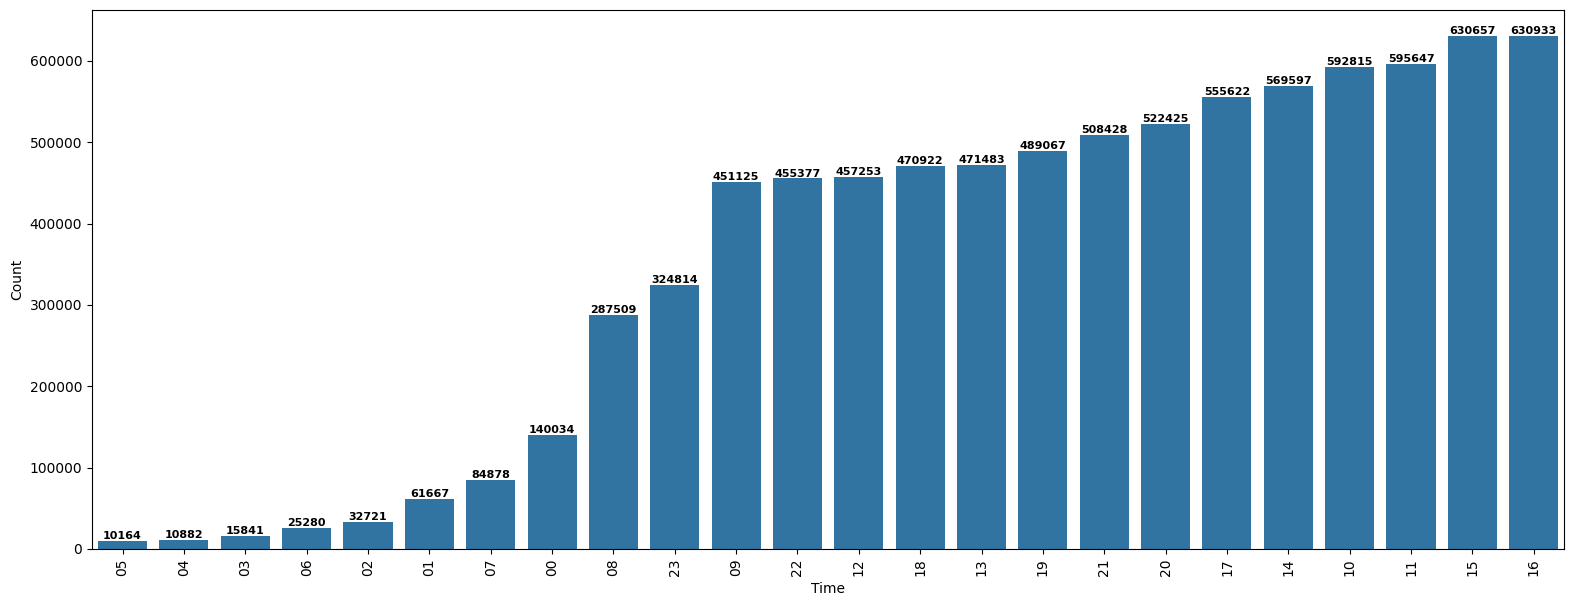

In [ ]:
plt.figure(figsize=(19, 7))
ax = sns.barplot(x='time', y='count', data=time_df)
# Th√™m ch√∫ th√≠ch l√† s·ªë gi√° tr·ªã tr√™n ƒë·∫ßu m·ªói c·ªôt
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize = 8
    )
plt.xlabel('Time')
plt.ylabel('Count')

plt.xticks(rotation = 90)
plt.show()

## L√†m s·∫°ch d·ªØ li·ªáu

### Lo·∫°i b·ªè c√°c d√≤ng c√≥ resource_id null

In [ ]:
comment_df = comment_df.dropna(subset=['resource_id'])

###G·ªôp c√°c d√≤ng tr·ª´ng l·∫∑p v√† t√≠nh s·ªë l∆∞·ª£ng l·∫∑p

In [ ]:
comment_df = comment_df.rename(columns={'size': "duplicate_count"})
comment_df.head()

id   user_id                                               text  \
0  Cm_10000008  28756094  ÊïôÂ∏àÁî®Â£∞Áõ∏ÂÖ≥ÁñæÁóÖÁöÑË°®ÂæÅ:1.Â§±Â£∞\n\n2.ÂóìÂ≠êÂπ≤Áóí\n\n3.ÂêûÂíΩÂõ∞Èöæ\n\n4.Â£∞Èü≥Ê≤ôÂìë...   
1  Cm_10000016  22852778                                                  üòÄ   
2  Cm_10000023  29581184                                                 ÊâìÂç°   
3  Cm_10000032   3921916  ËµÑ‰∫ßË¥üÂÄ∫Ë°®‰ªéË°®ÂÜÖÁöÑÈÄªËæë‰∏äÊù•ÁúãÔºåÂàóÊä•ËµÑ‰∫ßÊòØÂ∞±ÊåâÁÖßÊµÅÂä®ÊÄßÁöÑÈ´ò‰ΩéÔºå‰∏ÄËà¨ÊòØÊµÅÂä®ÊÄßË∂äÂø´Êàë‰ª¨ÊääÂÆÉÊîæÂú®Ë∂äÂâç...   
4  Cm_10000033   5515129                                                 ÊâìÂç°   

  resource_id          create_time time  duplicate_count  
0   V_1384107  2020-05-27 21:53:41   21                1  
1   V_1593539  2020-05-27 21:53:48   21                1  
2   V_1394195  2020-05-27 21:53:51   21                1  
3   V_1348357  2020-05-27 21:53:56   21                1  
4   V_1394187  2020-05-27 21:53:57   21                1